In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import AdaBoostClassifier



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [169]:
## stop warnings
import warnings
warnings.filterwarnings('ignore')

In [170]:
pd.set_option('display.max_columns', None)

In [171]:
 # Load the datasets
existing_customers = pd.read_excel('/content/drive/MyDrive/Data Mining/existing-customers.xlsx')  # 32561 record ##2399 contain null
potential_customers = pd.read_excel('/content/drive/MyDrive/Data Mining/potential-customers.xlsx')  # 16281 record #1221 contain null

In [172]:
existing_customers.columns

Index(['RowID', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [173]:
potential_customers.columns

Index(['RowID', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [174]:
#Shape of Data
existing_customers.shape

(32561, 15)

In [175]:
#Shape of Data
potential_customers.shape

(16281, 14)

In [176]:
#Check head of The Data
existing_customers.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,Row0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Row1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Row2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Row3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Row4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [177]:
#Check tail of The Data
existing_customers.tail()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
32556,Row32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Row32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Row32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Row32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,Row32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [178]:
#dtypes
existing_customers.dtypes

RowID             object
age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [179]:
#dtypes
potential_customers.dtypes

RowID             object
age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [180]:
existing_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RowID           32561 non-null  object
 1   age             32561 non-null  int64 
 2   workclass       30725 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  class           32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 3.7+ MB


In [181]:
potential_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RowID           16281 non-null  object
 1   age             16281 non-null  int64 
 2   workclass       15318 non-null  object
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [182]:
existing_customers.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [183]:
potential_customers.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,10.072907,1081.905104,87.899269,40.392236
std,13.849187,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [184]:
# check which features have null values in existing_customers
null_features = existing_customers.columns[existing_customers.isnull().any()]

#print the names of features with null values
null_features

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [185]:
# check which features have null values in potential_customers
null_features = potential_customers.columns[potential_customers.isnull().any()]

#print the names of features with null values
null_features

Index(['workclass', 'occupation', 'native-country'], dtype='object')

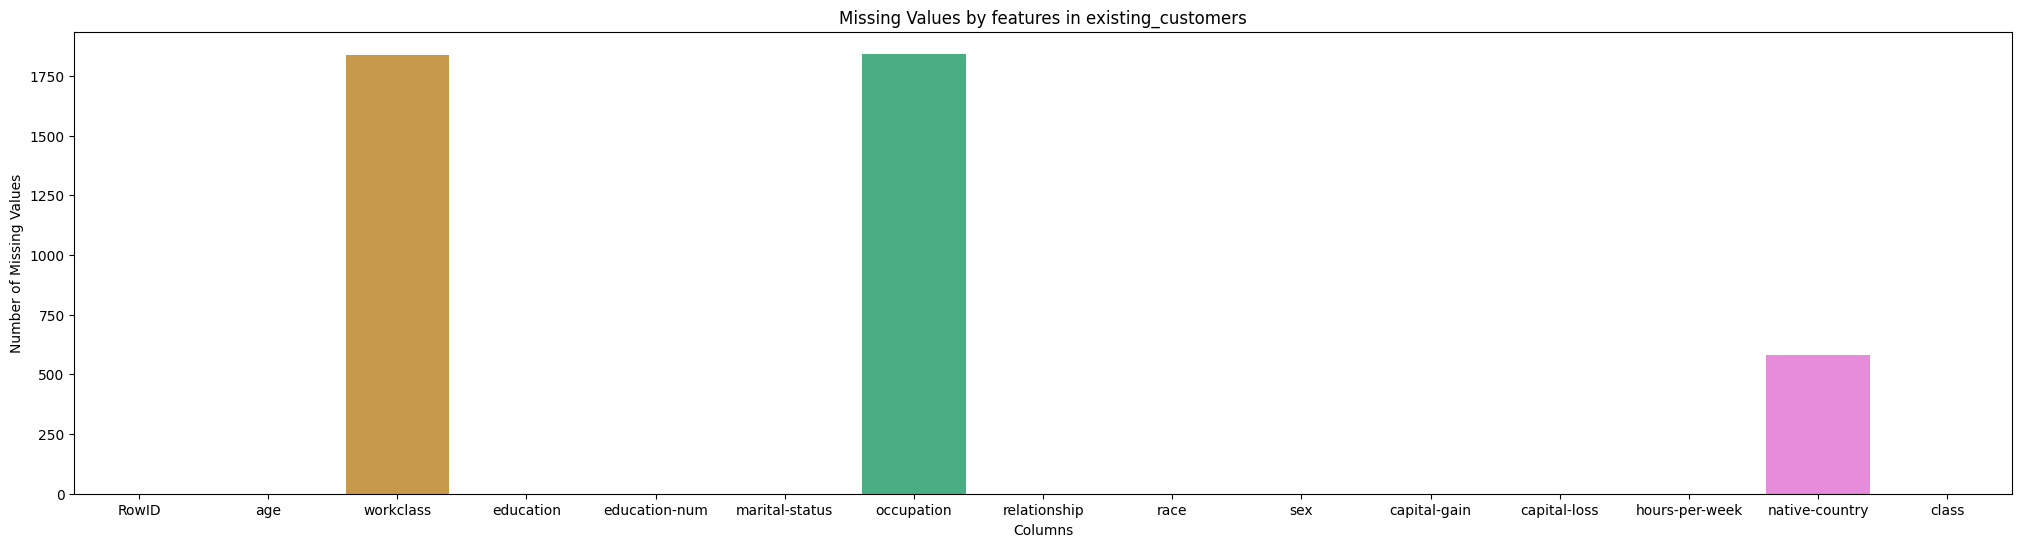

In [186]:
plt.figure(figsize=(25, 6))  # Set the figsize parameter to (width, height) in inches
sns.barplot(x=existing_customers.columns, y=existing_customers.isnull().sum())
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by features in existing_customers')
plt.show()

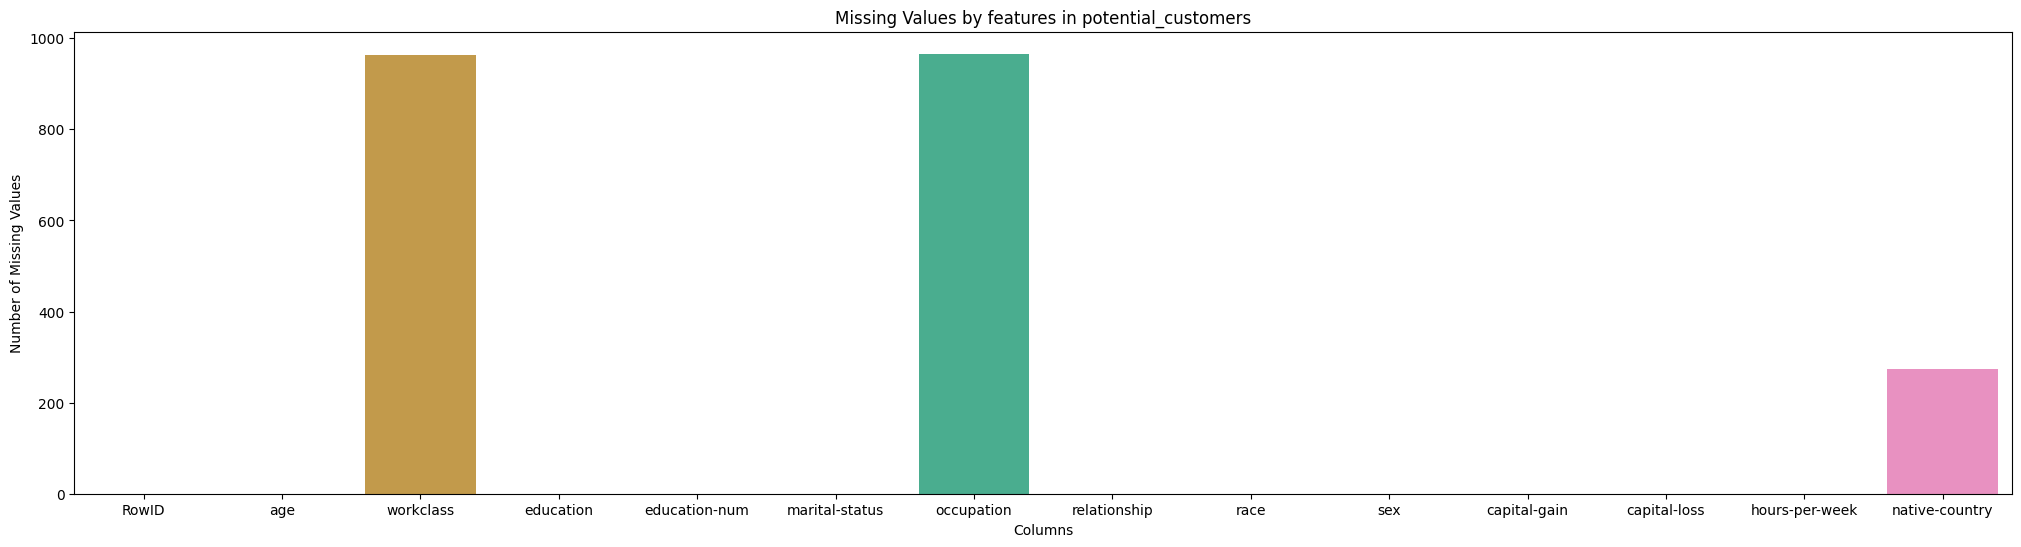

In [187]:
plt.figure(figsize=(25, 6))  # Set the figsize parameter to (width, height) in inches
sns.barplot(x=potential_customers.columns, y=potential_customers.isnull().sum())
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by features in potential_customers')
plt.show()

- ### _**Checking for null values**_

In [188]:
existing_customers.isnull().sum()

RowID                0
age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [189]:
potential_customers.isnull().sum()

RowID               0
age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

- #### _**Filling null values**_

In [190]:
existing_customers = existing_customers.fillna(existing_customers.mode().iloc[0])
existing_customers.isnull().sum()

RowID             0
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [191]:
potential_customers = potential_customers.fillna(potential_customers.mode().iloc[0])
potential_customers.isnull().sum()

RowID             0
age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

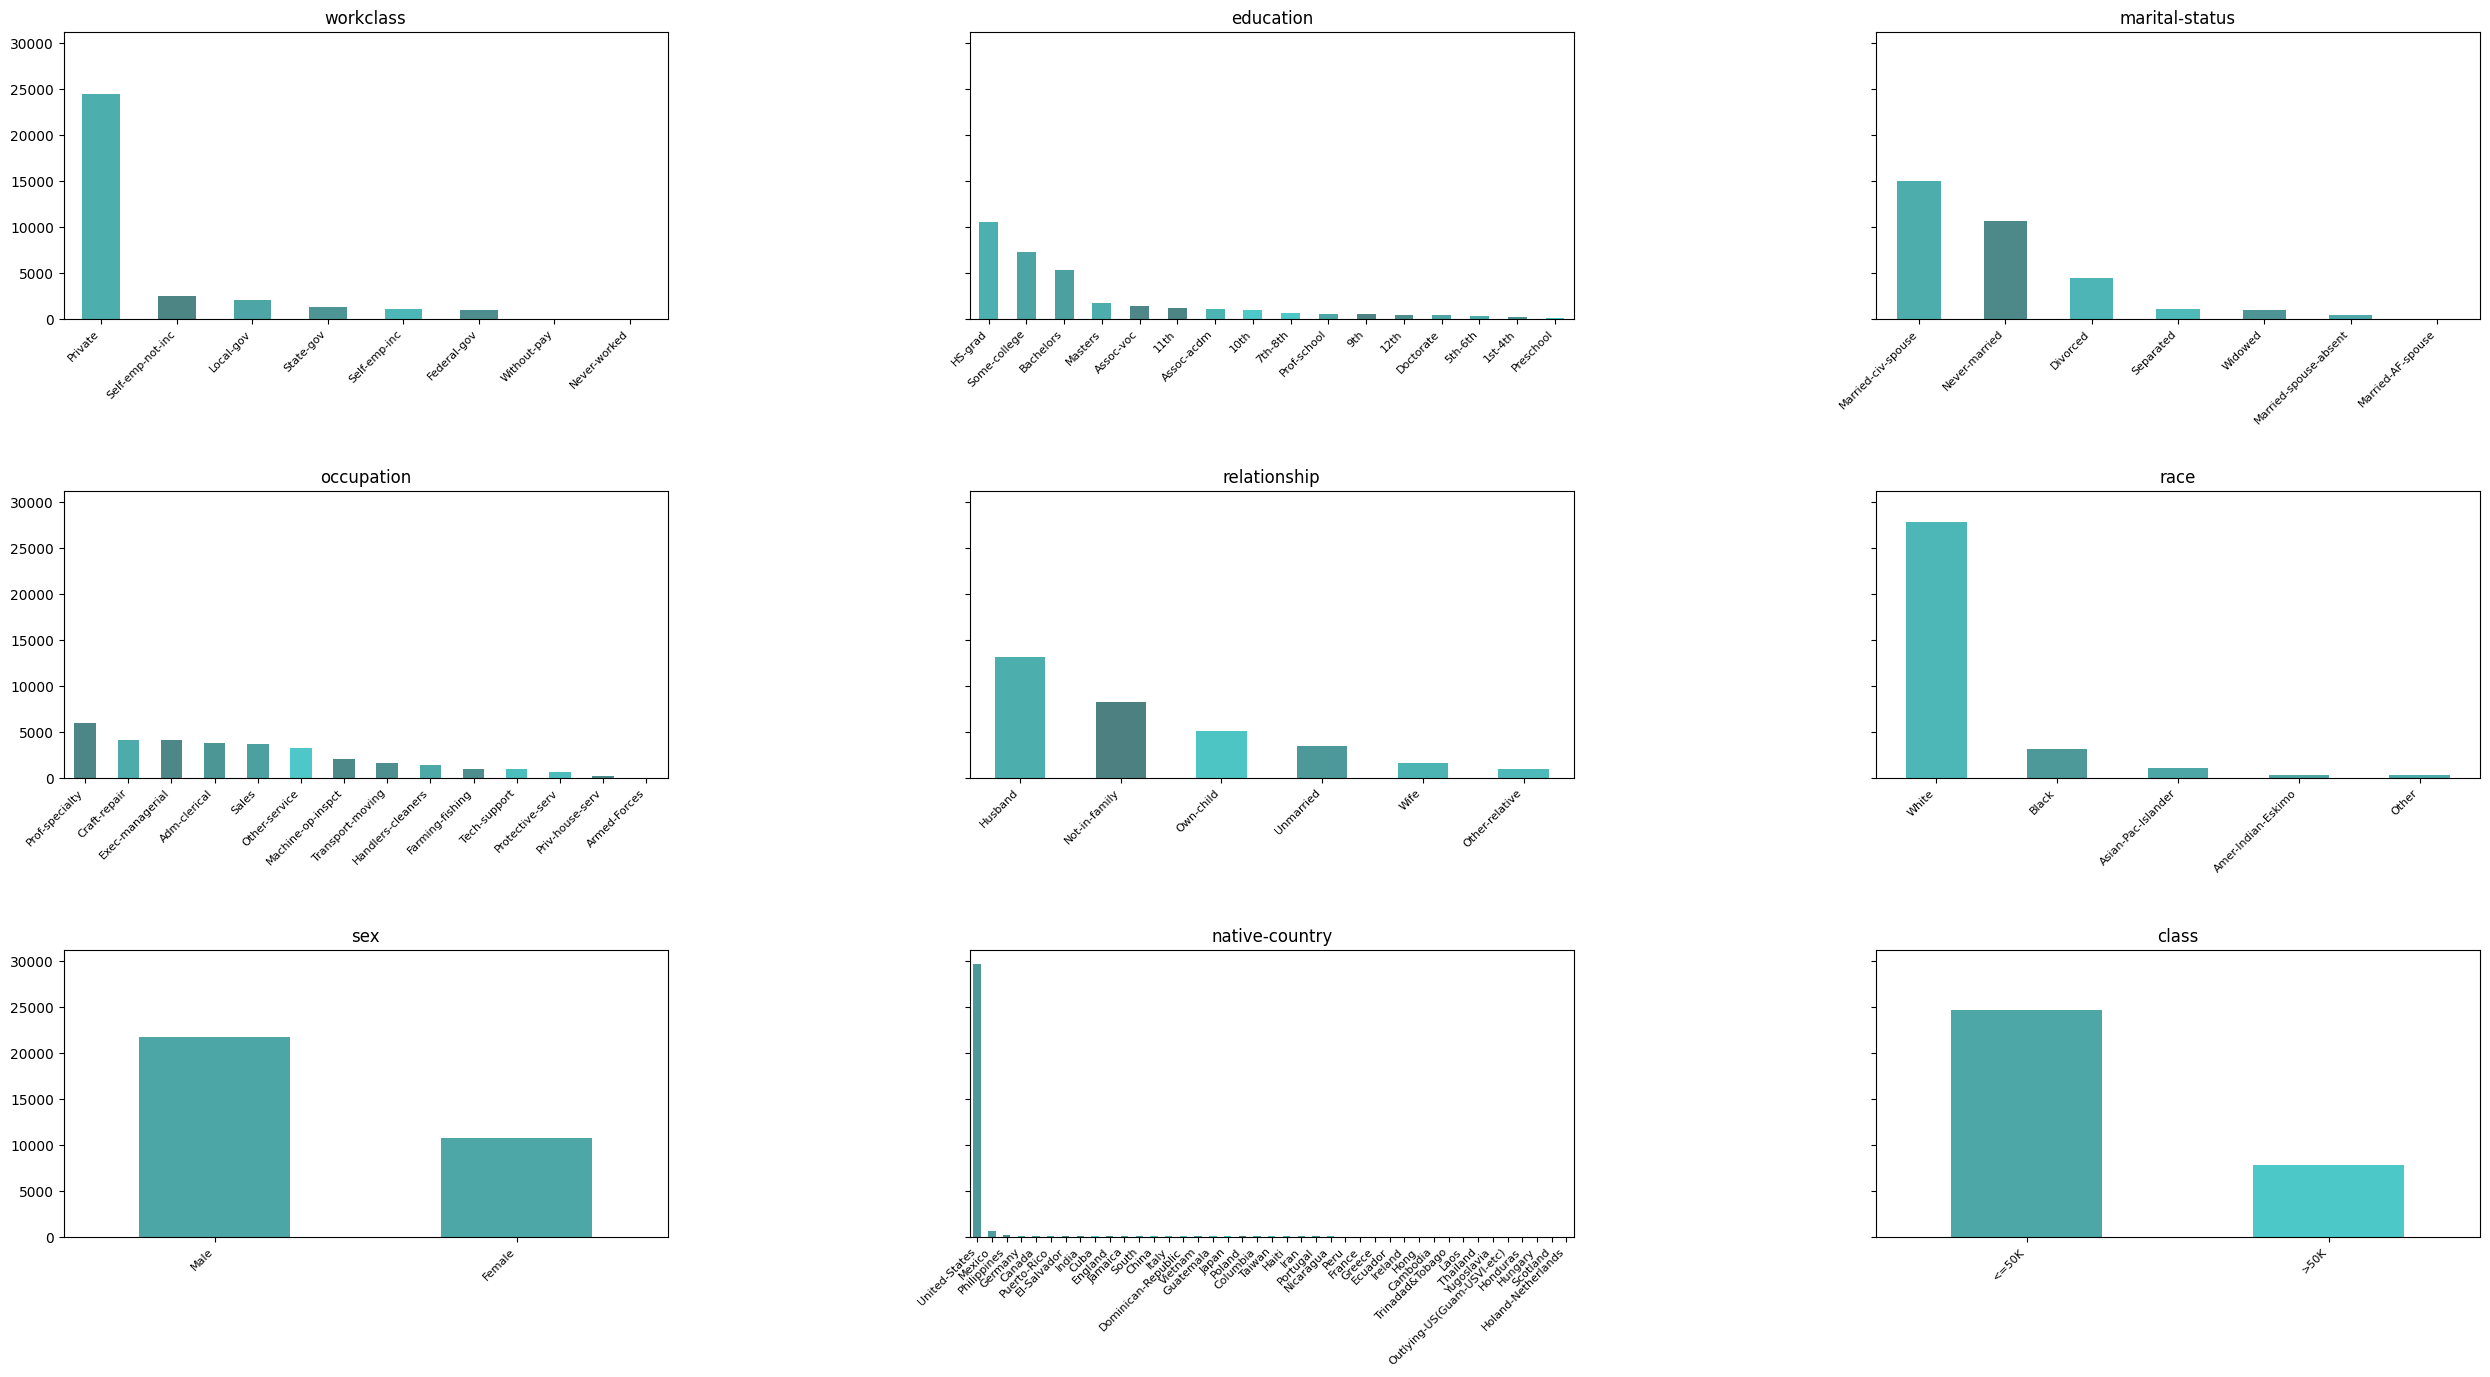

In [192]:
# Select only categorical columns

categories = existing_customers.drop(['RowID'], axis=1)
categorical_columns = categories.select_dtypes(include=['object', 'category']).columns

# Set up subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(25, 15), sharey=True)
 

# Loop through each categorical column and create a catplot with custom figure size
for i, column in enumerate(categorical_columns):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    colors = np.random.uniform(0.5, 0.8, size=len(categories[column].value_counts()))
    categories[column].value_counts().plot(kind='bar', ax=ax, color=[(0.3, c, c) for c in colors])
    axes[row_idx, col_idx].set_title(f'{column}')
    ax.set_xticklabels(categories[column].value_counts().index, rotation=45, size=8, ha='right')

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.6, wspace=0.5)
plt.show()

- #### _**Transforming String values to Numeric Values**_

In [193]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']


In [194]:
le = LabelEncoder()
  # Encode categorical variables in existing customers dataset
for col in cat_cols:
    existing_customers[col] = le.fit_transform(existing_customers[col])

# Encode categorical variables in potential customers dataset
for col in cat_cols:
    potential_customers[col] = le.fit_transform(potential_customers[col])


In [195]:
existing_customers.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,10.298210,10.080679,2.611836,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155
std,13.640433,1.107194,3.870264,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000
50%,37.000000,3.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,48.000000,3.000000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,7.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000


In [196]:
potential_customers.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,3.110128,10.268841,10.072907,2.632578,6.180947,1.437135,3.672440,0.667035,1081.905104,87.899269,40.392236,35.495854
std,13.849187,1.117966,3.882980,2.567545,1.510611,3.961058,1.592903,0.840327,0.471289,7583.935968,403.105286,12.479332,5.835711
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,3.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,3.000000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,7.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000


In [197]:
existing_customers['class'] = le.fit_transform(existing_customers['class'].astype(str))
existing_customers = existing_customers.rename(columns={'class': 'income_class'})


In [198]:
features = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'capital-gain',
                'capital-loss', 'hours-per-week', 'native-country', 'workclass', 'relationship', 'race', 'sex','native-country']
target = 'income_class'

In [199]:
# Min-max normalization of age, workclass, and education columns
scaler = MinMaxScaler()
existing_customers[features] = scaler.fit_transform(existing_customers[features])

In [200]:
potential_customers[features] = scaler.fit_transform(potential_customers[features])

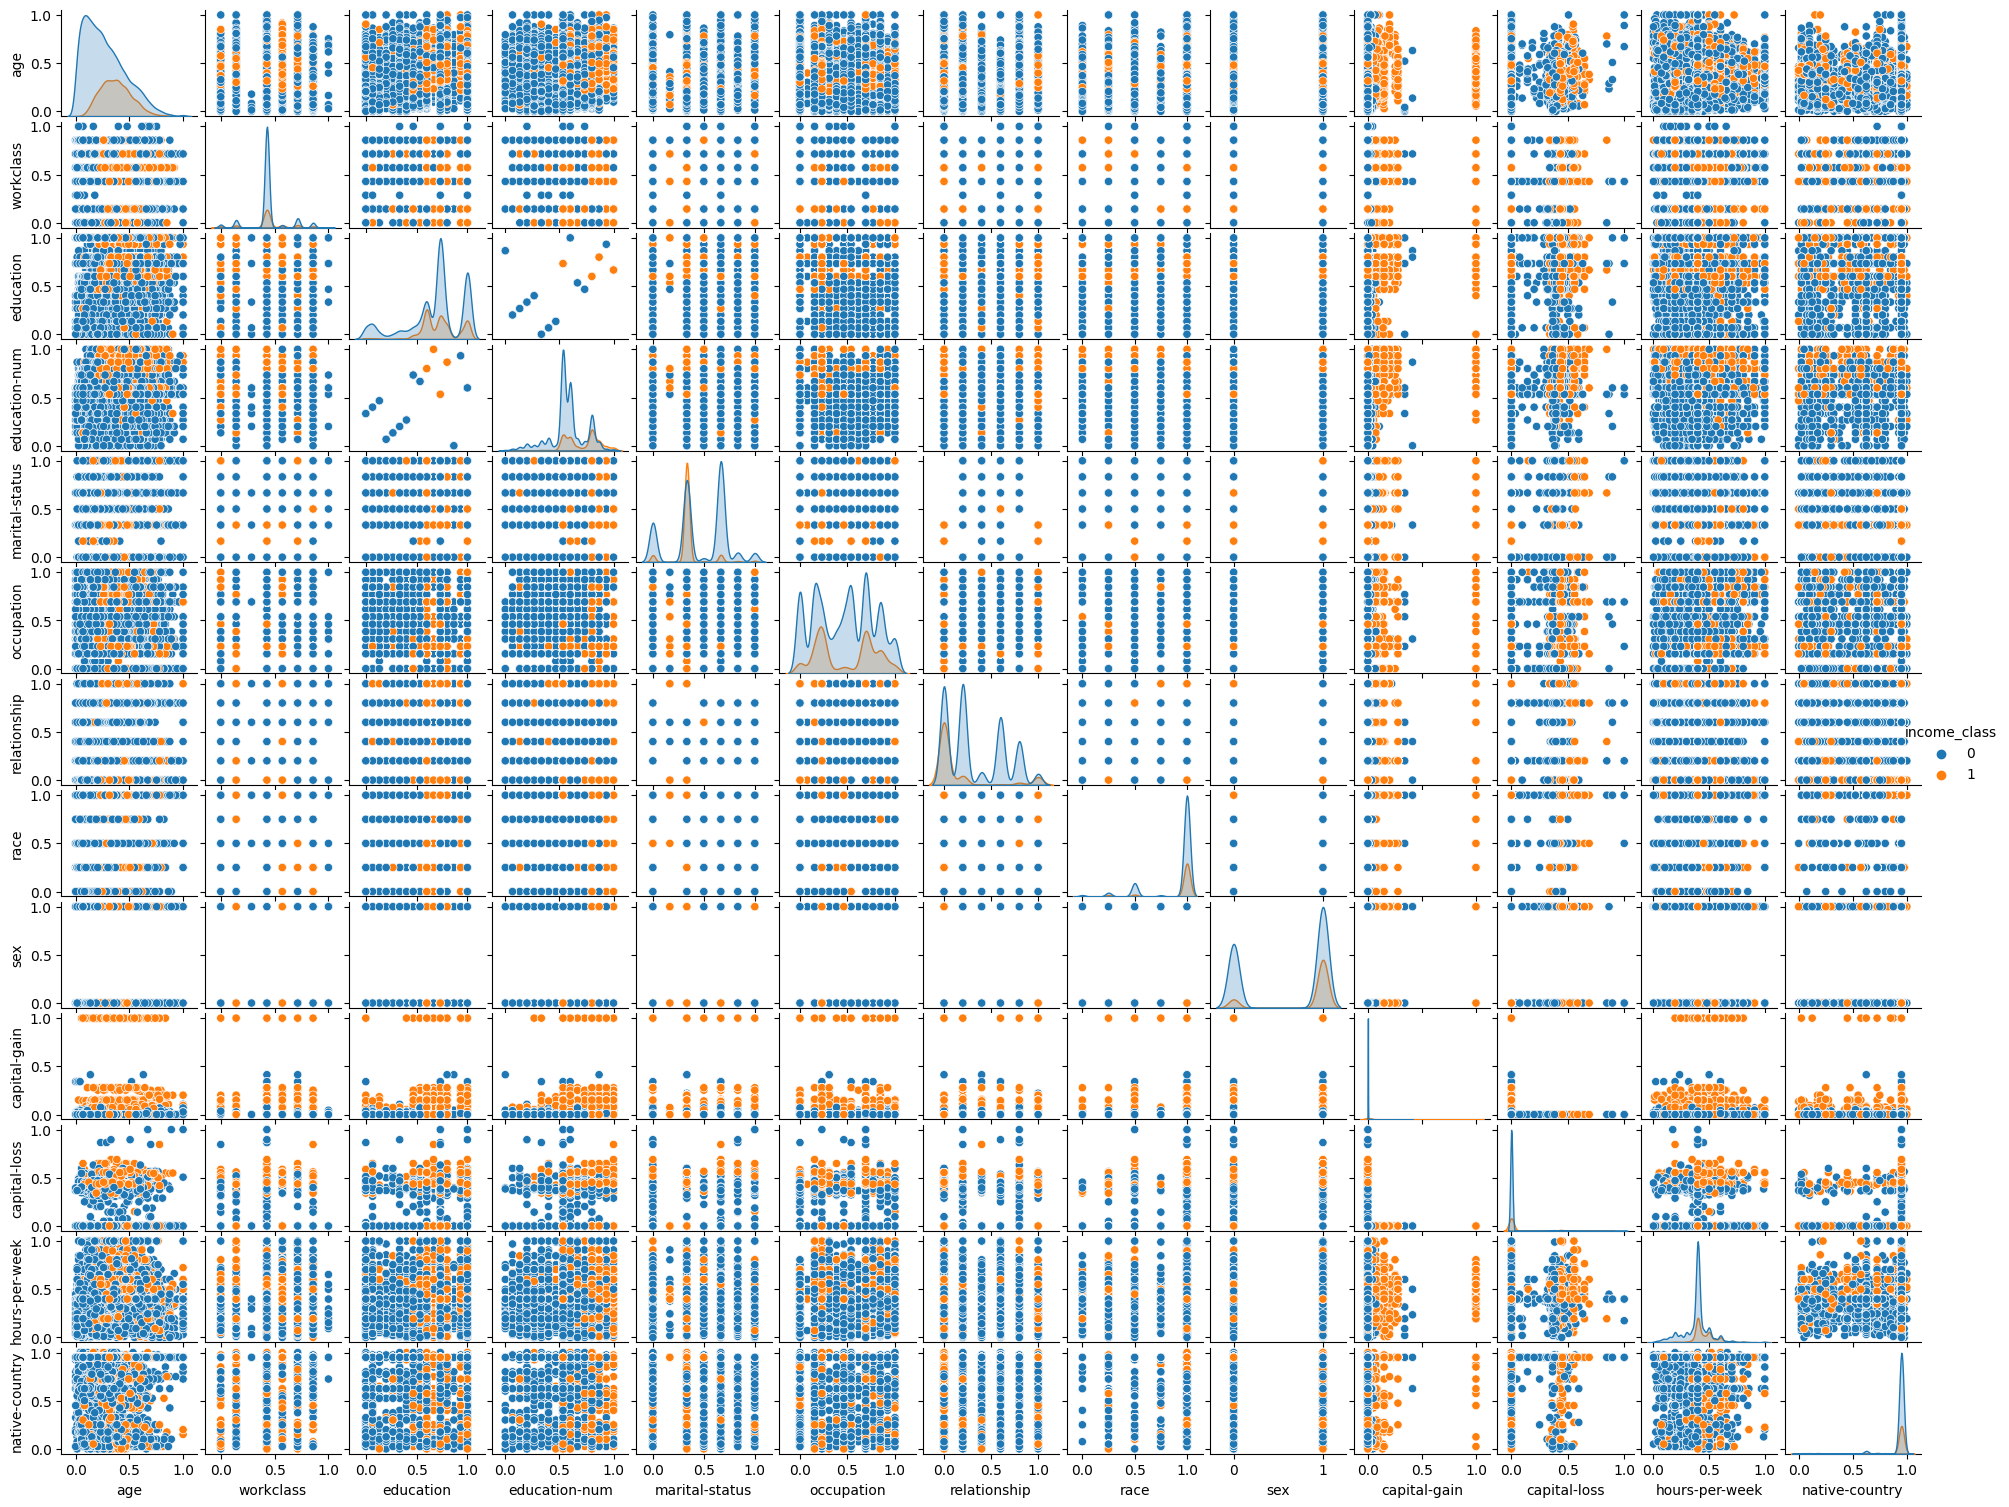

In [201]:
pairplot_figure = sns.pairplot(existing_customers, hue="income_class")
pairplot_figure.fig.set_size_inches(20, 15)


In [202]:
existing_customers.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,Row0,0.301370,0.857143,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95,0
1,Row1,0.452055,0.714286,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95,0
2,Row2,0.287671,0.428571,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95,0
3,Row3,0.493151,0.428571,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95,0
4,Row4,0.150685,0.428571,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.10,0


In [203]:
potential_customers.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,Row0,0.109589,0.428571,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718
1,Row1,0.287671,0.428571,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718
2,Row2,0.150685,0.142857,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,Row3,0.369863,0.428571,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718
4,Row4,0.013699,0.428571,1.000000,0.600000,0.666667,0.692308,0.6,1.0,0.0,0.000000,0.0,0.295918,0.948718


In [204]:
## declaring the features and target

X = existing_customers.drop(['RowID', 'income_class'], axis=1)
y = existing_customers['income_class']

print(X.shape, y.shape)

(32561, 13) (32561,)


In [205]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_test.value_counts())


(26048, 13) (26048,)
(6513, 13) (6513,)
0    4942
1    1571
Name: income_class, dtype: int64


In [207]:
def calculate_profit(cm):
  TN, FP, FN, TP = cm.ravel()
  print("TN", TN)
  print("FP", FP)
  print("FN", FN)
  print("TP", TP)
  return round(0.1*TP*(980-10)+0.05*FP*(-310-10))

In [208]:
modelTable = pd.DataFrame(columns=['Model',  'Recall', 'Precision', 'Accuracy',])

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


params = {'n_neighbors': [3, 5, 7, 9, 15, 18, 19, 21, 25, 30]}

grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, verbose=True, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNeighborsClassifier(n_neighbors=19)
0.8331155843146127


In [209]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the model
knnModel = KNeighborsClassifier(n_neighbors=19)

# Train the model
knnModel.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knnModel.predict(x_test)


accuracy= round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)
profit = calculate_profit(cm)
modelTable = modelTable.append({'Model': 'KNeighborsClassifier', 'Recall': recall, 'Precision': precision, 'Accuracy': accuracy, 'Profit': profit}, ignore_index=True)
                                      
modelTable[modelTable['Model'] == 'KNeighborsClassifier']

TN 4556
FP 386
FN 679
TP 892


,Model,Recall,Precision,Accuracy,Profit
0,KNeighborsClassifier,0.57,0.7,0.84,80348.0


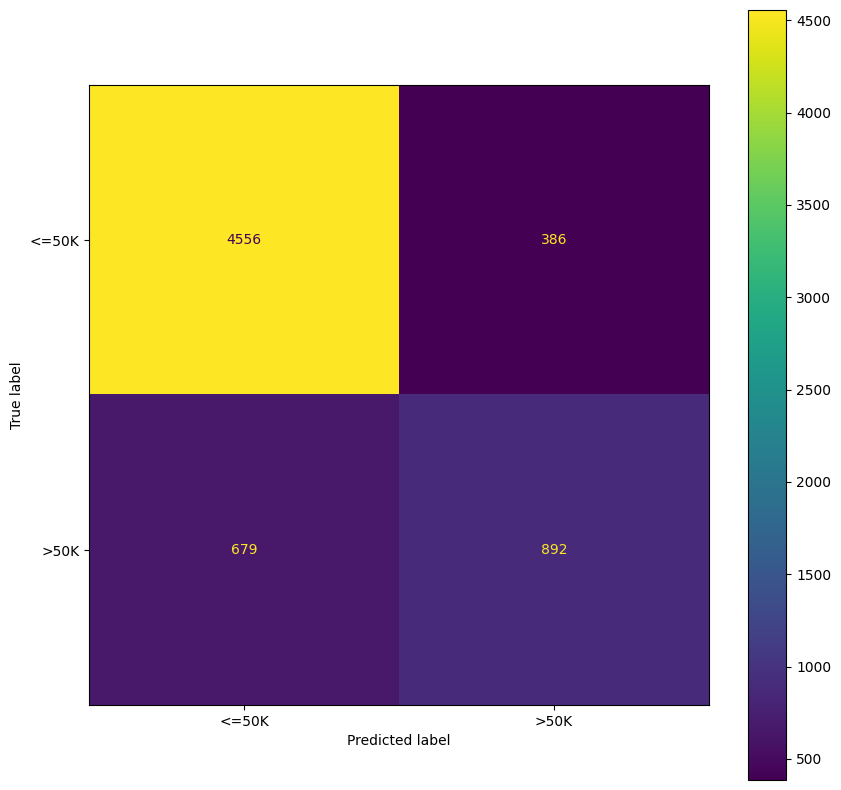

In [210]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

In [418]:
from sklearn.tree import DecisionTreeClassifier
params = {"max_depth" : [1, 2, 3, 5, 7, 9, 11, 15],
          "min_samples_leaf":[1, 2, 3, 5, 7, 9, 11, 13]}

grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, verbose=True, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
DecisionTreeClassifier(max_depth=11, min_samples_leaf=13)
0.857186885683239


In [211]:
from sklearn.tree import DecisionTreeClassifier
#Initialize the model
dtModel = DecisionTreeClassifier(max_depth=11, min_samples_leaf=13)

# Train the model
dtModel.fit(x_train, y_train)

# Make predictions on the test data
y_pred = dtModel.predict(x_test)


accuracy= round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)
profit = calculate_profit(cm)

modelTable = modelTable.append({'Model': 'DecisionTreeClassifier', 'Recall': recall, 'Precision': precision, 'Accuracy': accuracy, 'Profit': profit}, ignore_index=True)
                                      
modelTable[modelTable['Model'] == 'DecisionTreeClassifier']

TN 4665
FP 277
FN 666
TP 905


,Model,Recall,Precision,Accuracy,Profit
1,DecisionTreeClassifier,0.58,0.77,0.86,83353.0


In [479]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [5, 10, 15, 20, None],
          'n_estimators': [100, 500, 1000]}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
RandomForestClassifier(max_depth=15, n_estimators=500)
0.8635983196070288


In [212]:
from sklearn.ensemble import RandomForestClassifier
#Initialize the model
rfModel = RandomForestClassifier(max_depth=15)

# Train the model
rfModel.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rfModel.predict(x_test)


accuracy= round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)
profit = calculate_profit(cm)

modelTable = modelTable.append({'Model': 'RandomForestClassifier', 'Recall': recall, 'Precision': precision, 'Accuracy': accuracy, 'Profit': profit}, ignore_index=True)
                                      
modelTable[modelTable['Model'] == 'RandomForestClassifier']

TN 4670
FP 272
FN 590
TP 981


,Model,Recall,Precision,Accuracy,Profit
2,RandomForestClassifier,0.62,0.78,0.87,90805.0


In [46]:
from sklearn.naive_bayes import CategoricalNB
params = {'alpha': [0.001, 0.1, 0.5, 1.0], 'fit_prior': [True, False],}

grid = GridSearchCV(estimator=CategoricalNB(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CategoricalNB()
0.7697713355262504


In [213]:

nbModel = CategoricalNB()

# Fit the model to the training data
nbModel.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nbModel.predict(x_test)

accuracy= round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)
profit = calculate_profit(cm)

modelTable = modelTable.append({'Model': 'CategoricalNB', 'Recall': recall, 'Precision': precision, 'Accuracy': accuracy, 'Profit': profit}, ignore_index=True)
                                      
modelTable[modelTable['Model'] == 'CategoricalNB']

TN 4922
FP 20
FN 1477
TP 94


,Model,Recall,Precision,Accuracy,Profit
3,CategoricalNB,0.06,0.82,0.77,8798.0


In [64]:
# Define base estimators
base_estimators = [DecisionTreeClassifier(max_depth=2), CategoricalNB(), KNeighborsClassifier(n_neighbors=19)]
params = {'n_estimators': [50, 100, 200, 300, 1000], 
          'learning_rate': [0.1, 0.5, 1.0],
          'base_estimator': base_estimators,
}

grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params, verbose=1, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=300)
0.8722744371637896


In [214]:

# Initialize the AdaBoost classifier with Categorical Naive Bayes as base estimator
adaModel = AdaBoostClassifier(n_estimators=1000)

# Train the AdaBoost classifier on the training data
adaModel.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = adaModel.predict(x_test)

accuracy= round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
cm = confusion_matrix(y_test, y_pred)
profit = calculate_profit(cm)

modelTable = modelTable.append({'Model': 'AdaBoostClassifier', 'Recall': recall, 'Precision': precision, 'Accuracy': accuracy, 'Profit': profit}, ignore_index=True)
                                      
modelTable[modelTable['Model'] == 'AdaBoostClassifier']

TN 4670
FP 272
FN 535
TP 1036


,Model,Recall,Precision,Accuracy,Profit
4,AdaBoostClassifier,0.66,0.79,0.88,96140.0


In [215]:
modelTable.sort_values(by='Profit', ascending=False)

,Model,Recall,Precision,Accuracy,Profit
4,AdaBoostClassifier,0.66,0.79,0.88,96140.0
2,RandomForestClassifier,0.62,0.78,0.87,90805.0
1,DecisionTreeClassifier,0.58,0.77,0.86,83353.0
0,KNeighborsClassifier,0.57,0.70,0.84,80348.0
3,CategoricalNB,0.06,0.82,0.77,8798.0


In [216]:
X = potential_customers.drop(['RowID'], axis=1)
potential_customers["income_class"] = adaModel.predict(X)

In [217]:
potential_customers.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,Row0,0.109589,0.428571,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718,0
1,Row1,0.287671,0.428571,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718,0
2,Row2,0.150685,0.142857,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,0
3,Row3,0.369863,0.428571,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718,1
4,Row4,0.013699,0.428571,1.000000,0.600000,0.666667,0.692308,0.6,1.0,0.0,0.000000,0.0,0.295918,0.948718,0


In [219]:
high_income_customers = potential_customers[potential_customers[target] == 1]
low_income_customers = potential_customers[potential_customers[target] == 0]
print(len(high_income_customers))
print(len(low_income_customers))

3058
13223


In [220]:
target_customers = high_income_customers
rowID = target_customers['RowID'].values
np.savetxt('rowID.txt', rowID, fmt='%s')

In [223]:
numberOfPotentialCustomerWithHighIncome = precision * len(high_income_customers)
numberOfPotentialCustomerWithLowIncome = len(high_income_customers) - numberOfPotentialCustomerWithHighIncome
estimatedRevenue = 0.1 * numberOfPotentialCustomerWithHighIncome * (980-10)  + 0.05 * numberOfPotentialCustomerWithLowIncome * (-310 - 10)

In [225]:

print('Estimated revenue: ${}'.format(round(estimatedRevenue, 2)))

Estimated revenue: $224059.66
